# <center>Final Project : iMet Collection 2020 - Image Classification
### <center>Author : Hima Keerthi Garikapati (HG256)

***Installing the reticulate python environment to use Keras with tensorflow backend in R Kernel. The reticulate package provides an R interface to Python modules, classes, and functions.***

In [1]:
reticulate::use_condaenv("r-reticulate")
# reticulate::virtualenv_install("pandas", envname = "r-tensorflow")
reticulate::conda_install("pandas", envname = "r-reticulate")

  ***Installing libraries***

In [2]:
library(keras)
install_keras()

Warning message:
"package 'keras' was built under R version 3.6.3"



Installation complete.



***Importing packages***

In [3]:
library(tidyverse) # metapackage with lots of helpful functions
library(ggplot2)
library(caret)
library(imager)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'stringr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'caret' was built under R version 3.6.3"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Warning

In [4]:
library(tensorflow)
#install_tensorflow(version = "gpu")

Warning message:
"package 'tensorflow' was built under R version 3.6.3"

Attaching package: 'tensorflow'


The following object is masked from 'package:caret':

    train




***Set the working directory to local folder***

In [5]:
setwd("C:\\Users\\himak\\Desktop\\imet")

***loading the data**

In [6]:
labels <- read.csv("labels.csv")
train_df <- read.csv("train.csv")
test_df<- read.csv("sample_submission.csv")
TRAIN_DIR = "train" #Folder of train images
TEST_DIR = "test" # Folder of test images
head(train_df)
head(test_df)
head(labels)

,id,attribute_ids
,<fct>,<fct>
1,000040d66f14ced4cdd18cd95d91800f,448 2429 782
2,0000ef13e37ef70412166725ec034a8a,2997 3231 2730 3294 3099 2017 784
3,0001eeb4a06e8daa7c6951bcd124c3c7,2436 1715 23
4,000226398d224de78b191e6db45fd94e,2997 3433 448 782
5,00029c3b0171158d63b1bbf803a7d750,3465 3322 3170 1553 781
6,0002f685f83528cc3c92ba7f01110db5,2883 3293 3465 3286 448 2635 2088 785


,id,attribute_ids
,<fct>,<fct>
1,00011f01965f141f5d1eea6592fa9862,0 1 2
2,00014abc91ed3e4bf1663fde8136fe80,0 1 2
3,0002e2054e303badc1a33463f6fb7973,0 1 2
4,0002e8f35f85f28bebfb28f2a627dc4d,0 1 2
5,00082dfc0de78506f96104bc05eb5a49,0 1 2
6,000bb8d1f7cb3335a562e464749bb6e1,0 1 2


,attribute_id,attribute_name
,<int>,<fct>
1,0,country::afghanistan
2,1,country::alamania
3,2,country::algeria
4,3,country::arabia
5,4,country::armenia
6,5,country::austria


In [7]:
#converting the factor columns to string elements
#train_df$id <- as.character(train_df$id)
#head(train_df)

In [8]:
train_files <- list.files(TRAIN_DIR) #lists all the images in the train folder
length(train_files)
str(train_files)
head(train_files)


[1] 142119

 chr [1:142119] "000040d66f14ced4cdd18cd95d91800f.png" ...


[1] "000040d66f14ced4cdd18cd95d91800f.png"
[2] "0000ef13e37ef70412166725ec034a8a.png"
[3] "0001eeb4a06e8daa7c6951bcd124c3c7.png"
[4] "000226398d224de78b191e6db45fd94e.png"
[5] "00029c3b0171158d63b1bbf803a7d750.png"
[6] "0002f685f83528cc3c92ba7f01110db5.png"

In [9]:
##plotting a test image

# test_image <- load.image(paste(TRAIN_DIR,train_files[1],sep=''))
# plot(test_image)

***As the data is huge (train images = 142119), we're only considering a sample of 3001 images for training our model***

In [10]:
set.seed(123)
#smp_size <- floor(0.025 *length(train_files))
smp_size = 3001
train_ind <- sample(seq_len(length(train_files)), size = smp_size)
training <- train_files[train_ind]
str(training)

length(TRAIN_DIR[training])

 chr [1:3001] "f1d5fab7879c7487ce5d8c5e8990a3bb.png" ...


[1] 3001

***Creating a new folder in the current working directory with a random sample of 3001 train images***

In [11]:
dir.create("./train_sample")
file.copy(from = TRAIN_DIR[training], to = "./train_sample", recursive = TRUE,
         copy.mode = TRUE)

***Sampling random test images to predict with size of 500***

In [12]:
set.seed(123)
test_files <- list.files(TEST_DIR)
smp_size = 500
test_ind <- sample(seq_len(length(test_files)), size = smp_size)
testing <- test_files[test_ind]
str(testing)

length(TEST_DIR[testing]) #length of new sampled training images

 chr [1:500] "bb0f7c1b0b1b3aa386786d63fbf173e6.png" ...


[1] 500

***Creating a new folder for randmized sampled test images of 500***

In [13]:
dir.create("./test_sample")
file.copy(from = TEST_DIR[testing], to = "./test_sample", recursive = TRUE,
         copy.mode = TRUE)

***splitting the attribute_ids column into list of lables***

In [14]:
train_df$attribute_ids<-sapply(train_df$attribute_ids,function(x){str_split(train_df$attribute_ids[x], " ", n=Inf)})
head(train_df)

,id,attribute_ids
,<fct>,<list>
1,000040d66f14ced4cdd18cd95d91800f,"3216, 2663, 2635, 782"
2,0000ef13e37ef70412166725ec034a8a,"3270, 3465, 341 , 2462, 2362, 946 , 784"
3,0001eeb4a06e8daa7c6951bcd124c3c7,"241 , 2054, 1071, 784 , 22"
4,000226398d224de78b191e6db45fd94e,"2741, 617 , 590 , 2429, 1449, 792 , 2572, 1138, 2635, 785"
5,00029c3b0171158d63b1bbf803a7d750,"3465, 3170, 669 , 2670, 785"
6,0002f685f83528cc3c92ba7f01110db5,"370 , 149 , 2493"


***Adding ".png" at the end of every id in the train and test csv file to map it with the images in the folders***

In [15]:
train_df$id<-sapply(train_df$id,function(x){paste(train_df$id[x],".png",sep ="")})
head(train_df)

,id,attribute_ids
,<chr>,<list>
1,000040d66f14ced4cdd18cd95d91800f.png,"3216, 2663, 2635, 782"
2,0000ef13e37ef70412166725ec034a8a.png,"3270, 3465, 341 , 2462, 2362, 946 , 784"
3,0001eeb4a06e8daa7c6951bcd124c3c7.png,"241 , 2054, 1071, 784 , 22"
4,000226398d224de78b191e6db45fd94e.png,"2741, 617 , 590 , 2429, 1449, 792 , 2572, 1138, 2635, 785"
5,00029c3b0171158d63b1bbf803a7d750.png,"3465, 3170, 669 , 2670, 785"
6,0002f685f83528cc3c92ba7f01110db5.png,"370 , 149 , 2493"


In [16]:
test_df$id<-sapply(test_df$id,function(x){paste(test_df$id[x],".png",sep ="")})
head(test_df)
nrow(test_df$id)

,id,attribute_ids
,<chr>,<fct>
1,00011f01965f141f5d1eea6592fa9862.png,0 1 2
2,00014abc91ed3e4bf1663fde8136fe80.png,0 1 2
3,0002e2054e303badc1a33463f6fb7973.png,0 1 2
4,0002e8f35f85f28bebfb28f2a627dc4d.png,0 1 2
5,00082dfc0de78506f96104bc05eb5a49.png,0 1 2
6,000bb8d1f7cb3335a562e464749bb6e1.png,0 1 2


NULL

***Sampling the train and test cvs files which only match with the sampled images in train and test folders respectively***

In [17]:
#sample <- as.data.frame(train_df$id[train_df$id %in% new_list])

new_list = train_df$id[train_df$id %in% list.files(train_sample)]
length(new_list)
str(new_list)
sample <- as.data.frame(new_list)
colnames(sample) = "id"
head(sample)

[1] 3001

 chr [1:3001] "0000ef13e37ef70412166725ec034a8a.png" ...


,id
,<fct>
1,0000ef13e37ef70412166725ec034a8a.png
2,000a29222fe555d01844c73012af16d6.png
3,000a2f1a6de7dacf07c51c83618d20d5.png
4,000ab73d289605124c37c2d5a4b2cd2f.png
5,000aba2128c05407db8ff461fe8bc0f8.png
6,000ac5bbc6beca6f82ee7467975995ec.png


In [18]:
train_sample_csv <- merge(sample, train_df, by = "id", all.x = TRUE)
dim(train_sample_csv)
head(train_sample_csv)

[1] 3001    2

,id,attribute_ids
,<fct>,<list>
1,0000ef13e37ef70412166725ec034a8a.png,"3270, 3465, 341 , 2462, 2362, 946 , 784"
2,000a29222fe555d01844c73012af16d6.png,305
3,000a2f1a6de7dacf07c51c83618d20d5.png,"2757, 3263, 3026, 2791, 800 , 784"
4,000ab73d289605124c37c2d5a4b2cd2f.png,"2941, 233 , 2303, 2299, 783"
5,000aba2128c05407db8ff461fe8bc0f8.png,"3311, 378 , 2087, 2362, 1414, 2635, 1419, 60 , 37"
6,000ac5bbc6beca6f82ee7467975995ec.png,"3412, 1776, 1345, 2436, 2054, 924 , 1030, 1022, 2291, 2635, 785 , 73"


In [19]:
new_list_test = test_df$id[test_df$id %in% list.files(test_sample)]
sample_test <- as.data.frame(new_list_test)
colnames(sample_test) = "id"
test_sample_csv <- merge(sample_test, test_df, by = "id", all.x = TRUE)
head(test_sample_csv)
dim(test_sample_csv)

,id,attribute_ids
,<fct>,<fct>
1,000bb8d1f7cb3335a562e464749bb6e1.png,0 1 2
2,000bb98f62b3ee4995b64c5363d00fc8.png,0 1 2
3,00a791a8e350c93c8bc5132a6e68182b.png,0 1 2
4,00a7e8100bb59943709873bd7a48c092.png,0 1 2
5,00a81c3617800738acd5bce95ad39008.png,0 1 2
6,00a937ce09eeddb596c21166643779f4.png,0 1 2


[1] 500   2

***We perform a data normalization to reduce the effect of differences in the size of the images.***

In [20]:
train_data_gen = image_data_generator(rescale = 1/255,validation_split=0.1)

test_data_gen <- image_data_generator(rescale = 1/255)

In [32]:
# define batch size and number of epochs
batch_size <- 64
epochs <- 15
img_size <- 128

***Calculating the number of unique labels from the sampled training data***

In [22]:
classes_n <- length(unique(unlist(train_sample_csv$attribute_ids,use.names = FALSE)))
head(classes_n)
str(classes_n)

[1] 1266

 int 1266


***Image data augmentation***
<br /> 
<br /> 
*An iterator is created for an image dataset located on disk in a specified directory, where images in that directory are organized into subdirectories according to their class*
<br />
<br /> 
*Splitting the training images into training and validation set where 0.9% of images are trained while 0.1% images are validated*

In [23]:
#Training images

train_image_array_gen <- flow_images_from_dataframe(dataframe = train_sample_csv, directory = train_sample,
                                                      x_col = "id", y_col = "attribute_ids",
                                                      generator = train_data_gen, target_size = c(128, 128),seed=123,
                                                      color_mode = "rgb", classes = NULL, class_mode = "categorical",
                                                      batch_size = batch_size, subset ='training')

valid_image_array_gen <- flow_images_from_dataframe(dataframe=train_sample_csv,
                                            directory=train_sample, generator = train_data_gen,
                                            x_col="id", y_col = "attribute_ids",seed =123,
                                            batch_size=batch_size,
                                                    shuffle= TRUE,
                                            class_mode="categorical",
                                            target_size=c(128,128),subset='validation')

In [24]:
#Test
test_image_array_gen <- flow_images_from_dataframe(directory = test_sample, dataframe = test_sample_csv,x_col="id",
                                                      generator = test_data_gen , target_size = c(128, 128), seed=123,
                                                      color_mode = "rgb",class_mode = NULL,batch_size = 1,
                                                      shuffle = FALSE )

In [25]:
head(table(factor(unlist(train_image_array_gen$classes))))
output_n <- length(unique(factor(unlist(train_image_array_gen$classes))))
output_n


 0  1  2  3  4  5 
 2 21  2  1  5  1 

[1] 1204

In [26]:
output_v <- length(unique(factor(unlist(valid_image_array_gen$classes))))
output_v

[1] 400

In [27]:
head(valid_image_array_gen$classes)
head(valid_image_array_gen$class_indices)

[[1]]
[1]  916 1042 1006  474  444 1251 1201

[[2]]
[1] 785

[[3]]
[1]  588  911  774  609 1206 1201

[[4]]
[1]  724  437  427  425 1200

[[5]]
[1]  942 1061  364  444  132  536  133 1137 1057

[[6]]
 [1] 1009  267  115  464  353 1243    8    7  424  536 1202 1184

$`0`
[1] 0

$`10`
[1] 1

$`1007`
[1] 2

$`1009`
[1] 3

$`1014`
[1] 4

$`1018`
[1] 5

In [28]:
# number of training samples
train_samples <- train_image_array_gen$n
# number of validation samples
valid_samples <- valid_image_array_gen$n
#number of test images to be predicted
test_n <- length(test_image_array_gen$filenames)

In [29]:
str(train_samples)
str(valid_samples)
str(test_n)

 int 2701
 int 300
 int 500


<br />***Using Keras Sequential Model***
<br /><br />
*The first is the convolutional (Conv2D) layer. It is a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 adn 128 filters for the two last ones respectively. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Using 'relu' activation function to add non linearity to the network.
<br /><br />
The MaxPool2D layer acts as a downsampling filter.These are used to reduce computational cost, and to some extent also reduce overfitting.
<br /><br />
Using dropout as a regularization method, where a proportion of nodes in the layer are randomly ignored for each training sample, a technique to improve generalization and reduce overfitting
<br /><br />
Flattening layer to convert the final feature maps into a one single 1D vector.Using sigmoid activation function at the end(output) instead of regular softmax to predicct the net outputs distribution of probability of multi lable classifcation.
<br /><br />
Using the Binary cross-entropy loss function for multi-label classifications, instead of categorical cross entropy, which is for multi-class classification. The metric function "accuracy" is used is to evaluate the performance of the model. This metric function is similar to the loss function, except that the results from the metric evaluation are not used when training the model (only for evaluation).*




In [30]:
# initialise model
model <- keras_model_sequential()
img_width <- 128
img_height <- 128
target_size <- c(img_width, img_height)

# RGB = 3 channels
channels <- 3

# add layers
model %>%
  layer_conv_2d(filter = 32, kernel_size = c(3,3), padding = "same", input_shape = c(img_width, img_height, channels)) %>%
  layer_activation("relu") %>%
  layer_batch_normalization() %>%

  # Second hidden layer
  layer_conv_2d(filter =32, kernel_size = c(3,3), padding = "same") %>%
  layer_activation_leaky_relu(0.5) %>%
  layer_batch_normalization() %>%

  # Use max pooling
  layer_max_pooling_2d(pool_size = c(4,2)) %>%
  layer_dropout(0.5) %>%
  
###SECOND LAYER
  layer_conv_2d(filter = 64, kernel_size = c(4,4), padding = "same", input_shape = c(img_width, img_height, channels)) %>%
  layer_activation("relu") %>%
  layer_batch_normalization() %>%

  # Second hidden layer
  layer_conv_2d(filter =64, kernel_size = c(4,4), padding = "same") %>%
  layer_activation_leaky_relu(0.5) %>%
  layer_batch_normalization() %>%

  # Use max pooling
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  layer_dropout(0.5) %>%

##THIRD LAYER

  layer_conv_2d(filter = 128, kernel_size = c(3,3), padding = "same", input_shape = c(img_width, img_height, channels)) %>%
  layer_activation("relu") %>%
  layer_batch_normalization() %>%

  # Second hidden layer
  layer_conv_2d(filter =128, kernel_size = c(3,3), padding = "same") %>%
  layer_activation_leaky_relu(0.5) %>%
  layer_batch_normalization() %>%

  # Use max pooling
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  layer_dropout(0.5) %>%


  # Flatten max filtered output into feature vector 
  # and feed into dense layer
  layer_flatten() %>%
  layer_dense(1024) %>%
  layer_activation("relu") %>%
  layer_batch_normalization() %>%
  layer_dropout(0.5) %>%

  # Outputs from dense layer are projected onto output layer - sigmoid classifier
  layer_dense(classes_n) %>% 
  layer_activation("sigmoid")

# compile
model %>% compile(
  loss = "binary_crossentropy",
  optimizer = optimizer_rmsprop(lr = 0.0001, decay = 1e-6),
  metrics = "accuracy"
)

In [31]:
model

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d (Conv2D)                     (None, 128, 128, 32)            896         
________________________________________________________________________________
activation (Activation)             (None, 128, 128, 32)            0           
________________________________________________________________________________
batch_normalization (BatchNormaliza (None, 128, 128, 32)            128         
________________________________________________________________________________
conv2d_1 (Conv2D)                   (None, 128, 128, 32)            9248        
________________________________________________________________________________
leaky_re_lu (LeakyReLU)             (None, 128, 128, 32)            0           
________________________________________________________________________________
ba

***Fitting the model***

In [33]:
#Fit
start <- Sys.time()
start
history <- model %>% fit_generator(
  # training data
  train_image_array_gen,
  # epochs
  steps_per_epoch = ceiling(train_samples / batch_size), 
  epochs = epochs, 
  
  # validation data
  validation_data = valid_image_array_gen,
  validation_steps = ceiling(valid_samples / batch_size),
    callback_model_checkpoint(paste0("imet_model1.h5"), save_best_only = TRUE),
  
  # print progress
  verbose = 2
)
    
Sys.time() - start

[1] "2020-05-04 01:41:32 EDT"

Time difference of 59.41934 mins

*Due to some unknown error, the verbose (print progress of each epoch) does not work in R Kernel*

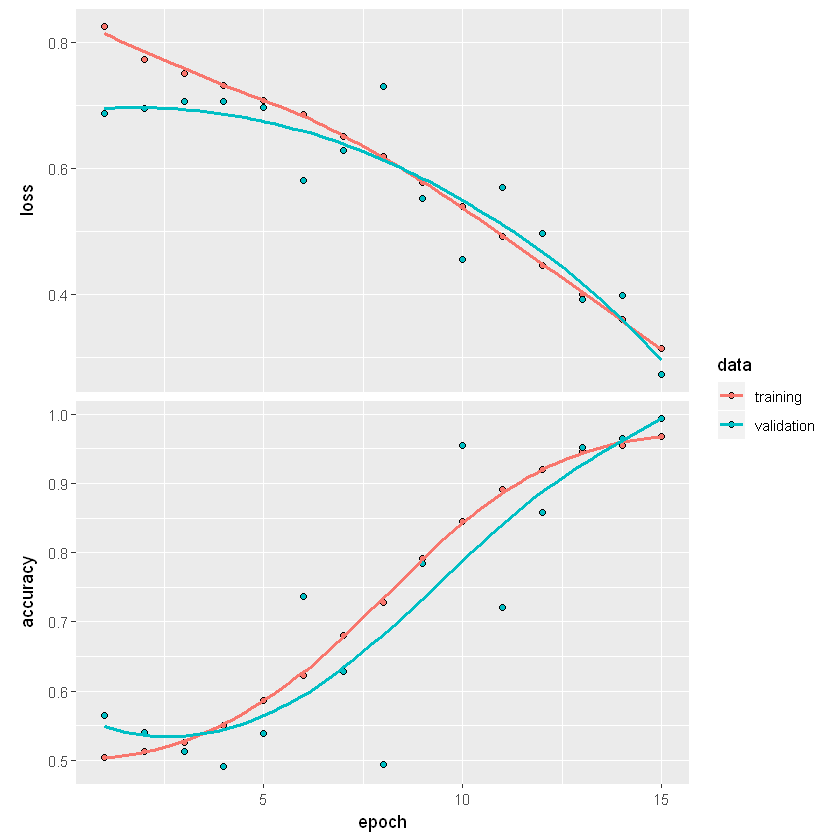

In [34]:
plot(history)

*From the above graph, it is clear that the accuracy for validation data has increased significantly with every epoch while the loss has decreased significantly*

***Evaluating the model to see the performance of the model***

In [46]:
model %>% evaluate_generator(valid_image_array_gen,steps=ceiling(valid_samples))

$loss
[1] 0.2784275

$accuracy
[1] 0.9935361

In [45]:
valid_image_array_gen$reset()
y_val_predict <- model %>% predict_generator(valid_image_array_gen, steps = ceiling(valid_samples), verbose = 1, callbacks = NULL)
y <- as.data.frame(y_val_predict)
colnames(y) <- unique(unlist(train_sample_csv$attribute_ids,use.names = FALSE))

***Predicting the test images***

In [86]:
test_image_array_gen$reset()
y_predict <- model %>% predict_generator(test_image_array_gen, steps = test_n, verbose = 1, callbacks = NULL)

In [87]:
y_test <- as.data.frame(y_predict)
colnames(y_test) <- unique(unlist(test_sample_csv$attribute_ids,use.names = FALSE))

In [88]:
filenames = test_image_array_gen$filenames
submissions <- data.frame('id' = filenames, 'labels' = y_test)
# save the file
write.csv(submissions, "submission.csv", sep = " ", row.names = FALSE)
submission <- read.csv("submission.csv")
head(submission)

,id,labels
,<fct>,<fct>
1,000bb8d1f7cb3335a562e464749bb6e1.png,
2,000bb98f62b3ee4995b64c5363d00fc8.png,782 783 784
3,00a791a8e350c93c8bc5132a6e68182b.png,783
4,00a7e8100bb59943709873bd7a48c092.png,2299 23 785
5,00a81c3617800738acd5bce95ad39008.png,
6,00a937ce09eeddb596c21166643779f4.png,3170 3270 784
